# Step-by-step example of $k$-means

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'red']

In [2]:
wine = pd.read_csv('wine_noclass.csv')
labels = pd.read_csv('wine.data')['Class']
scaler = StandardScaler()
scaler.fit(wine.values)
wine = pd.DataFrame(scaler.transform(wine.values), columns = wine.columns)

<font color = 'green'> __Centroid__: <font color = 'red'> 

Like other ML models, $k$-means attempts to minimize a measure of goodness-of-fit. But how do you measure goodness of fit when you don't know what you're supposed to fit? One option: instead of saying that we want to be close to a known correct labeling, try to classify points so that points in the same cluster are close to **one another.**

<font color = 'green'> __Sum of squared distances in class $m$__: <font color = 'red'> 

<font color = 'black'>
    
$$ \sum_{\mathbf{x}_i, \mathbf{x}_j \in C_m} \|\mathbf{x}_i - \mathbf{x}_j\|^2 $$

<font color = 'green'> __Sum of squared distance from centroid:__ <font color = 'red'> 
    <font color = 'black'>
$$ \sum_{\mathbf{x}_i \in C_m} \|\mathbf{x}_i - \overline{\mathbf{x}}_m\|^2 $$

($\overline{\mathbf x}_m$ means the centroid of class $m$)

<font color = 'green'> __$k$-means clustering:__ <font color = 'red'> **Cluster points in the following way:**
* Each point is classified according to which cluster's centroid it is closest to
* Try to place the centroids so that the sums of squared distances between points and their corresponding centroids is minimized
    
<font color = 'black'> Bad news: the problem of finding the centroids that minimize this measure of goodness of fit is NP-hard (meaning it can take a very large amount of computation time to solve).

Good news: there is a fast algorithm that usually gets close to optimal. When people talk about ``the $k$-means algorithm'' this is generally what they mean.

In [29]:
# Find the centroid of a given set of points
def get_centroid(df):
    averages = np.average(df, axis = 0)
    return pd.Series(averages, index = df.columns)

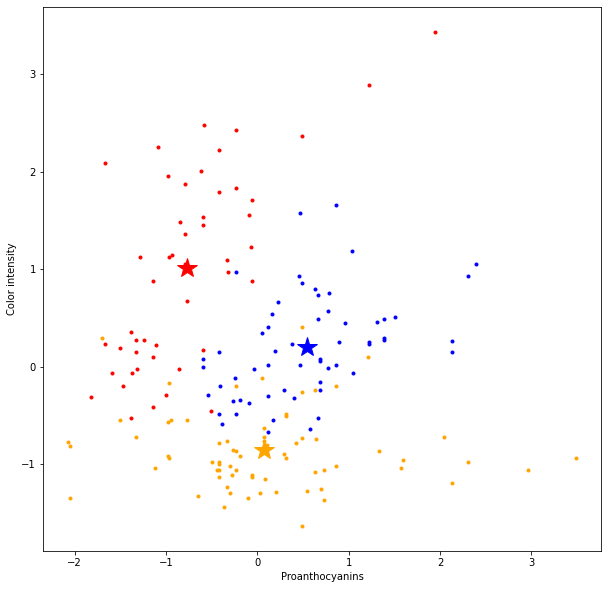

In [59]:
centroid_1 = get_centroid(wine.loc[np.where(labels == 1)])
centroid_2 = get_centroid(wine.loc[np.where(labels == 2)])
centroid_3 = get_centroid(wine.loc[np.where(labels == 3)])

fig = plt.figure(figsize=(10,10))
for i in range(3):
    plt.plot(wine.loc[np.where(labels == i + 1)]['Proanthocynanins'], 
             wine.loc[np.where(labels == i + 1)]['Color intensity'],
             '.', color = colors[i])
#plt.plot(wine['Proanthocynanins'], wine['Color intensity'], 'o')
plt.plot(centroid_1['Proanthocynanins'], centroid_1['Color intensity'], '*', color = colors[0], markersize = 20)
plt.plot(centroid_2['Proanthocynanins'], centroid_2['Color intensity'], '*', color = colors[1], markersize = 20)
plt.plot(centroid_3['Proanthocynanins'], centroid_3['Color intensity'], '*', color = colors[2], markersize = 20)
plt.xlabel('Proanthocyanins')
plt.ylabel('Color intensity')
plt.show()

<font color = 'green'> __Nearest centroid classifier__: <font color = 'red'> **Like a 1-nearest neighbor classifier, but classify new points by which class centroid they are closest to.**

In [12]:
# Label data points by what centroid is closest (nearest centroid classification)
def find_nearest_centroid(observation, centroids):
    distances = [np.sum((observation - centroid) ** 2) for centroid in centroids]
    return np.argmin(distances)

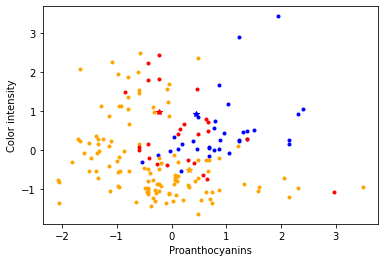

In [49]:
centroid_1 = wine.loc[int(np.random.uniform(0, len(wine)))]
centroid_2 = wine.loc[int(np.random.uniform(0, len(wine)))]
centroid_3 = wine.loc[int(np.random.uniform(0, len(wine)))]

centroids = [centroid_1, centroid_2, centroid_3]

new_labels = np.array([find_nearest_centroid(wine.loc[i], centroids) for i in range(len(wine))])
for i in range(3):
    plt.plot(wine.loc[np.where(new_labels == i)]['Proanthocynanins'], 
             wine.loc[np.where(new_labels == i)]['Color intensity'],
             '.', color = colors[i])
#plt.plot(wine['Proanthocynanins'], wine['Color intensity'], 'o')
plt.plot(centroid_1['Proanthocynanins'], centroid_1['Color intensity'], '*', color = colors[0])
plt.plot(centroid_2['Proanthocynanins'], centroid_2['Color intensity'], '*', color = colors[1])
plt.plot(centroid_3['Proanthocynanins'], centroid_3['Color intensity'], '*', color = colors[2])
plt.xlabel('Proanthocyanins')
plt.ylabel('Color intensity')
plt.show()

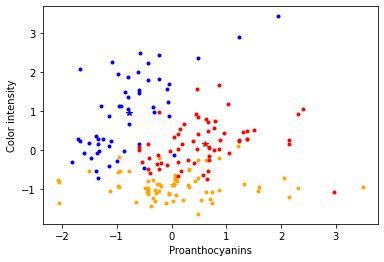

In [45]:
centroid_1 = get_centroid(wine.loc[np.where(new_labels == 0)])
centroid_2 = get_centroid(wine.loc[np.where(new_labels == 1)])
centroid_3 = get_centroid(wine.loc[np.where(new_labels == 2)])

new_centroids = [centroid_1, centroid_2, centroid_3]
new_labels = np.array([find_nearest_centroid(wine.loc[i], new_centroids) for i in range(len(wine))])
for i in range(3):
    plt.plot(wine.loc[np.where(new_labels == i)]['Proanthocynanins'], 
             wine.loc[np.where(new_labels == i)]['Color intensity'],
             '.', color = colors[i])
#plt.plot(wine['Proanthocynanins'], wine['Color intensity'], 'o')
plt.plot(centroid_1['Proanthocynanins'], centroid_1['Color intensity'], '*', color = colors[0])
plt.plot(centroid_2['Proanthocynanins'], centroid_2['Color intensity'], '*', color = colors[1])
plt.plot(centroid_3['Proanthocynanins'], centroid_3['Color intensity'], '*', color = colors[2])
plt.xlabel('Proanthocyanins')
plt.ylabel('Color intensity')
plt.show()

pandas.core.series.Series

pandas.core.frame.DataFrame